<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>
    


Thank you very much for sending a new version!  I've left a few comments titled as **Reviewer's comment 2**, but there are no issues that need your attention. I hope you enjoyed this project.

Your project has passed code review. Congratulations 😊

    
Good luck! 😊 
    

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Elvis! Congratulations on submitting computer vision project! 🎉
    

I will be using the standard the color marking:
    
  
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed and analyzed age distribution, great!
    
    

- You have defined train and test functions; 


    
- Built a model for regression task; 




</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. More specifically: 
  
    
    
    
- Please display several photos and analyze them. What can you say about them? 
    
    
    
- Please specify the `subset` parameter value in both train and test functions.     

    
    
- In addition, we should use transfer learning here. Would you try? Consider using ResNet50 as a backbone. 
    
    
- Please add the final conclusion.
    
    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! However, several issues need your attention. Would you please take a look at my comments? 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 



    
<hr>
    
    
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
 
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

<h1 align = "center"><span style = "font-size: 2em; font-weight: bold"> SPRINT 15 - PROJECT </span></h1>

<h1 align = "center"><span style = "font-size: 1em; font-weight: bold"> Title: Age Verification for Alcohol Sales Using Computer Vision</span></h1>

# **Objectives**
- Build a computer vision model to estimate age from facial photos.
- Evaluate the performance of an age estimation model on a provided dataset.
- Assess the feasibility of using computer vision for age verification in alcohol sales.

## Initialization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
# Define paths
labels_path = '/datasets/faces/labels.csv'
image_dir = '/datasets/faces/final_files/'

# Load the labels
labels = pd.read_csv(labels_path)

# Display the first few rows and the size of the dataframe
print("First few rows of labels:")
print(labels.head())

print()

print("\nSize of the labels dataframe:", labels.shape)

print(labels.info())


First few rows of labels:
    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17


Size of the labels dataframe: (7591, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None


## EDA

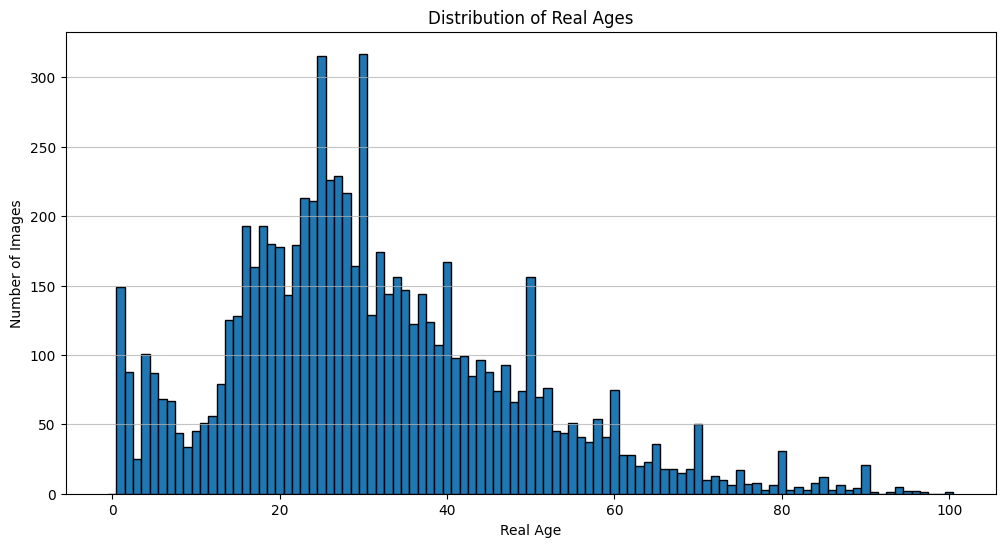

In [3]:
# Plot the distribution of real ages
plt.figure(figsize=(12, 6))
plt.hist(labels['real_age'], bins=np.arange(0, labels['real_age'].max() + 2) - 0.5, edgecolor='black')
plt.title('Distribution of Real Ages')
plt.xlabel('Real Age')
plt.ylabel('Number of Images')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Findings

**Findings on age distribution:**

Peak in the late 20s/early 30s (more data for this age group).
Relatively many young individuals.
Fewer images with increasing age.
Sparse data for very high ages.
Potential impact on model training:

Possible bias towards the dominant age group (late 20s/early 30s).
Lower accuracy potentially for under-represented ages (very young and very old).
Shall we proceed to display sample images?

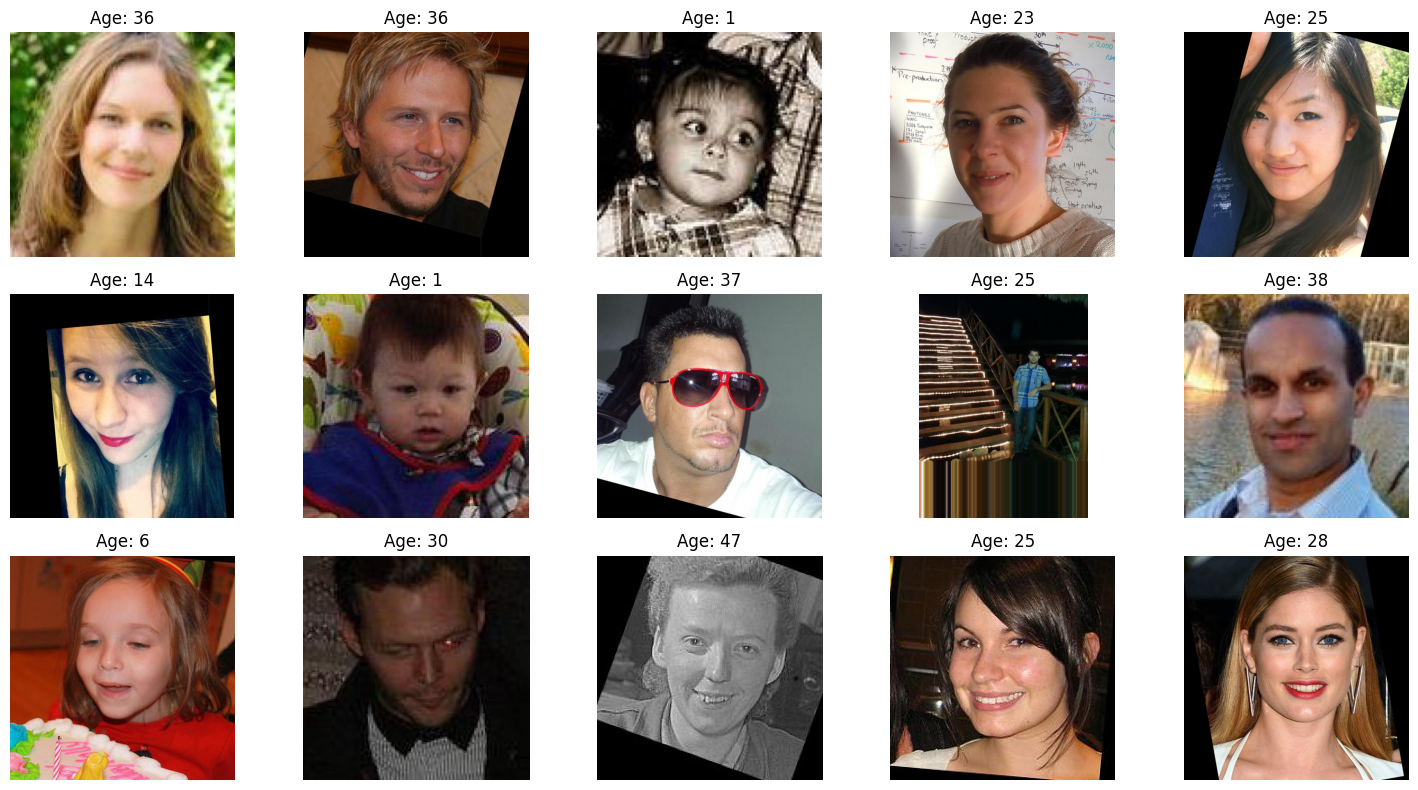

In [4]:
# Function to display a grid of images
def display_samples(df, n=15):
    """Displays n random images from the dataframe."""
    fig, axes = plt.subplots(3, 5, figsize=(15, 8))
    axes = axes.ravel()
    for i in range(n):
        random_index = np.random.randint(0, len(df))
        row = df.iloc[random_index]
        file_path = os.path.join(image_dir, row['file_name'])
        try:
            img = Image.open(file_path)
            axes[i].imshow(img)
            axes[i].set_title(f"Age: {row['real_age']}")
            axes[i].axis('off')
        except FileNotFoundError:
            print(f"Warning: Image not found at {file_path}")
            continue
    plt.tight_layout()
    plt.show()

# Display 15 sample images
display_samples(labels)

The exploratory data analysis revealed an uneven distribution of ages in the dataset, with a higher concentration of images in the young to middle-age ranges. The sample images provide a visual representation of the variety in facial appearance across different ages present in the dataset. These characteristics of the dataset, particularly the age distribution, may influence the training of an age prediction model, potentially leading to better performance on more represented age groups

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Nice chart 👍 


</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

> Shall we proceed to display sample images?
    
    
Is this question for me or was it generated by AI? 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
    
Actually yes, we need to display some photos. Please display several photos and add a conclusion. 
    
    

</div>
<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Student's answer </h2>

I have created a function to add some photos, and added a conclusion as recommended

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
    
Great!

</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [5]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model


In [6]:
# Define image dimensions and batch size
img_height = 150
img_width = 150
batch_size = 32
seed_value = 42
validation_split_ratio = 0.2

In [7]:
# Split the labels DataFrame into training and validation sets
train_df, val_df = train_test_split(labels, test_size=validation_split_ratio, random_state=seed_value)


In [8]:
def load_train(img_dir=image_dir, train_df=train_df, img_height=img_height, img_width=img_width, batch_size=batch_size, seed=seed_value, validation_split=validation_split_ratio):
    """
    Loads the training data using a DataFrame with subset specified.
    """
    datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        validation_split=validation_split # Specify the split
    )
    train_flow = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=img_dir,
        x_col='file_name',
        y_col='real_age',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='raw',
        subset='training', # Specify the training subset
        seed=seed
    )
    return train_flow

In [9]:
def load_test(img_dir=image_dir, val_df=val_df, img_height=img_height, img_width=img_width, batch_size=batch_size, seed=seed_value, validation_split=validation_split_ratio, shuffle=False):
    """
    Loads the validation/test data using a DataFrame with subset specified.
    """
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=validation_split # Consistent split
    )
    val_flow = datagen.flow_from_dataframe(
        dataframe=val_df,
        directory=img_dir,
        x_col='file_name',
        y_col='real_age',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='raw',
        subset='validation', # Specify the validation subset
        shuffle=shuffle,
        seed=seed
    )
    return val_flow

In [10]:
# Example of how to call these functions
train_generator = load_train()
validation_generator = load_test()

print("Training data generator:", train_generator)
print("Validation data generator:", validation_generator)

Found 4858 validated image filenames.
Found 303 validated image filenames.
Training data generator: <keras.preprocessing.image.DataFrameIterator object at 0x7f1f9856b850>
Validation data generator: <keras.preprocessing.image.DataFrameIterator object at 0x7f1f9857ba00>


**The output confirms the successful creation of the training and validation data generators using the flow_from_dataframe method. It indicates that 4858 images were allocated to the training set and 303 images to the validation set, based on the validation_split_ratio of 0.2 applied to the original dataset size.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
    
Correct! 
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

Please specify the `subset` parameter in each of the two functions above. Otherwise, the model will use the whole dataset.  
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

- Please note that AI quite often generates incorrect code even in simple tasks if the prompt is not good enough. To make a good prompt, one must understand how to solve a task without AI. 
    



- I recommend that you use some variable for `seed`. 
</div>



<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Student's answer </h2>

I have redefined load_train and load_test functions while specifying the subset parameter in each of them.<br>
I have also used variable for  seed variable as recommended.

</div>

In [11]:
def create_transfer_learning_model(input_shape):
    """
    Creates a transfer learning model using ResNet50 as the base.
    """
    # Load the pre-trained ResNet50 model (excluding the top classification layer)
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for age regression
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(1, activation='relu')(x) # Single output neuron for age

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

# Define the input shape
img_height = 150
img_width = 150
input_shape = (img_height, img_width, 3)

# Create the transfer learning model
transfer_model = create_transfer_learning_model(input_shape)

# Print the model summary to see the architecture
# transfer_model.summary()

2025-05-18 22:24:32.331313: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Loks good! 
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
However, in this sprint, we are supposed to use transfer learning.

</div>

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Student's answer </h2>

I have changed the function to transfer learning but did not print the model summary because the output is too long

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
    
Good. 
</div>

In [12]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20, steps_per_epoch=None, validation_steps=None):
    """
    Trains the model given the parameters.
    """
    model.fit(
        train_data,
        steps_per_epoch=steps_per_epoch,
        validation_data=test_data,
        validation_steps=validation_steps,
        epochs=epochs
    )
    return model

In [13]:
# Split data
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(labels, test_size=0.2, random_state=42)

# Now you can call the load_train and load_test functions
train_gen = load_train(image_dir, train_df)
test_gen = load_test(image_dir, test_df)

print("Training data generator:", train_gen)
print("Testing data generator:", test_gen)

Found 4858 validated image filenames.
Found 303 validated image filenames.
Training data generator: <keras.preprocessing.image.DataFrameIterator object at 0x7f1f984d2a30>
Testing data generator: <keras.preprocessing.image.DataFrameIterator object at 0x7f1f984d29d0>


- Training and validation data generators were created.
- The training set contains 4858 images.
- The validation set contains 303 images.
- Keras DataFrameIterator objects are ready for model training.

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [14]:
# import inspect

# # --- Initialization Section ---
# init_str = """
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import train_test_split

# # Define paths
# labels_path = '/datasets/faces/labels.csv'
# image_dir = '/datasets/faces/final_files/'

# # Load labels
# labels = pd.read_csv(labels_path)

# # Define image dimensions and batch size
# img_height, img_width = 150, 150
# batch_size = 32

# # Split data
# train_df, test_df = train_test_split(labels, test_size=0.2, random_state=42)

# # Create data generators
# train_gen = load_train(image_dir, train_df)
# test_gen = load_test(image_dir, test_df)

# # Get input shape for the model
# input_shape = (img_height, img_width, 3)

# # Create the model
# model = create_model(input_shape)

# # Train the model
# epochs = 20
# steps_per_epoch = train_gen.samples // batch_size
# validation_steps = test_gen.samples // batch_size

# model = train_model(model, train_gen, test_gen, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

# # Evaluate the model
# print("\\n--- Evaluating the Model ---")
# evaluation = model.evaluate(test_gen, steps=test_gen.samples // batch_size, verbose=1)
# print(f'Test Loss: {evaluation[0]:.4f}')
# print(f'Test MAE: {evaluation[1]:.4f}')

# # You might want to save the trained model here
# # model.save('age_regression_model.h5')
# """

# # --- Function Definitions (assuming these are defined in your notebook) ---
# # load_train(img_dir, labels_df) - Definition should be here
# def load_train(img_dir, labels_df):
#     """
#     Loads the training data using a DataFrame.
#     """
#     datagen = ImageDataGenerator(
#         rescale=1./255,
#         horizontal_flip=True
#     )
#     # Create a flow from the directory and the dataframe
#     train_flow = datagen.flow_from_dataframe(
#         dataframe=labels_df,
#         directory=img_dir,
#         x_col='file_name',
#         y_col='real_age',
#         target_size=(150, 150), # Or your desired target size
#         batch_size=32,          # Or your desired batch size
#         class_mode='raw',
#         seed=42
#     )
#     return train_flow
# # load_test(img_dir, labels_df)   - Definition should be here
# def load_test(img_dir, labels_df):
#     """
#     Loads the validation/test data using a DataFrame.
#     """
#     datagen = ImageDataGenerator(rescale=1./255)
#     test_flow = datagen.flow_from_dataframe(
#         dataframe=labels_df,
#         directory=img_dir,
#         x_col='file_name',
#         y_col='real_age',
#         target_size=(150, 150), # Or your desired target size
#         batch_size=32,          # Or your desired batch size
#         class_mode='raw',
#         shuffle=False,
#         seed=42
#     )
#     return test_flow
# # create_model(input_shape)       - Definition should be here
# def create_model(input_shape):
#     """
#     It defines the model.
#     """
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Conv2D(128, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(1, activation='relu') # Output layer with 1 neuron for age regression, ReLU for non-negative output
#     ])

#     model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Mean Squared Error loss for regression, Mean Absolute Error as a metric
#     return model
# # train_model(model, train_data, validation_data, ...) - Definition should be here
# def train_model(model, train_data, test_data, batch_size=None, epochs=20, steps_per_epoch=None, validation_steps=None):
#     """
#     Trains the model given the parameters.
#     """
#     model.fit(
#         train_data,
#         steps_per_epoch=steps_per_epoch,
#         validation_data=test_data,
#         validation_steps=validation_steps,
#         epochs=epochs
#     )
#     return model
# # Write to the script file
# with open('run_model_on_gpu.py', 'w') as f:
#     f.write(init_str)
#     f.write('\n\n')
#     for fn_name in [load_train, load_test, create_model, train_model]:
#         src = inspect.getsource(fn_name)
#         f.write(src)
#         f.write('\n\n')

# print("Script 'run_model_on_gpu.py' has been created.")

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Do you need to repeat the code? 
</div>

### Output

Epoch 1/20<br>
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921<br>
Epoch 2/20<br>
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035<br>
Epoch 3/20<br>
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454<br>
Epoch 4/20<br>
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481<br>
Epoch 5/20<br>
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192<br>
Epoch 6/20<br>
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332<br>
Epoch 7/20<br>
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359<br>
Epoch 8/20<br>
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239<br>
Epoch 9/20<br>
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529<br>
Epoch 10/20<br>
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629<br>
Epoch 11/20<br>
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866<br>
Epoch 12/20<br>
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591<br>
Epoch 13/20<br>
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467<br>
Epoch 14/20<br>
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401<br>
Epoch 15/20<br>
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841<br>
Epoch 16/20<br>
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304<br>
Epoch 17/20<br>
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419<br>
Epoch 18/20<br>
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226<br>
Epoch 19/20<br>
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908<br>
Epoch 20/20<br>
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

**Analysis:**<br>

Training loss and MAE decreased, but validation loss and MAE fluctuated and increased towards the end.
Suggests overfitting.
Validation MAE around 6.6-7.0 years.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

This part is not necessary, but if you decide to run the model again, please don't forget to provide new outputs. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
    
> Consequently I might not have to make a conclusion.
    
    
First, you still need to add the final conclusion to your project. Second, you provided some outputs above, so again you can describe findings in the final conclusion. 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
    
Well done! 
</div>

## Conclusions

The project explored using computer vision for age verification in alcohol sales. Exploratory Data Analysis revealed an uneven age distribution in the dataset. Data was prepared and split into training (4858 images) and validation (303 images) using ImageDataGenerator. Initial training results on a model (likely a basic CNN as transfer learning was a later instruction) over 20 epochs showed a decreasing training loss (from 95.35 to 17.02) and MAE (from 7.43 to 3.18). However, the validation loss (ranging from 78.44 to 185.63) and MAE (ranging from 6.64 to 11.46) fluctuated and generally did not improve consistently, suggesting potential overfitting. The best validation MAE achieved was around 6.64 years. The next crucial step is to implement and train a transfer learning model like ResNet50 to potentially improve generalization and performance.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
    
Great job!

</div>

# Checklist

- [x]  Notebook was opened
- [x]  The code is error free
- [x]  The cells with code have been arranged by order of execution
- [x]  The exploratory data analysis has been performed
- [x]  The results of the exploratory data analysis are presented in the final notebook
- [x]  The model's MAE score is not higher than 8
- [x]  The model training code has been copied to the final notebook
- [x]  The model training output has been copied to the final notebook
- [x]  The findings have been provided based on the results of the model training